# План

1. EDA<br>
1.1 `groups_df`<br>
1.2 `groups_add_df`<br>
1.3 `active_studs_df`<br>
1.4 `checks_df`<br>
1.5 Работа с датафреймами
2. А/Б-тестирование<br>
2.1 Метрики<br>
2.2 Вывод
3. SQL<br>
3.1 Очень усердные ученики<br>
3.2 Оптимизация воронки
4. Python<br>
4.1 Функция для метрик<br>
4.2 Функция для графиков

# 1. EDA

In [1]:
# Импортируем необходимые библиотеки

import pandas as pd
import pandahouse as ph

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as ss
import pingouin as pg

import requests
from urllib.parse import urlencode

import warnings
warnings.filterwarnings("ignore")

Для начала считаем датасеты, подготовим их для дальнейшей работы и проведем предварительное исследование данных.

In [2]:
# Ссылки на датасеты

groups_link = 'https://disk.yandex.ru/d/UhyYx41rTt3clQ'
groups_add_link = 'https://disk.yandex.ru/d/5Kxrz02m3IBUwQ'
active_studs_link = 'https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ'
checks_link = 'https://disk.yandex.ru/d/pH1q-VqcxXjsVA'

In [3]:
# Функция для формирования ссылки на датасет для считывания

def get_download_url(public_key):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    return download_url

In [4]:
# Считываем датасеты и записываем их в датафреймы

groups_df = pd.read_csv(get_download_url(groups_link), sep=';')
groups_add_df = pd.read_csv(get_download_url(groups_add_link))
active_studs_df = pd.read_csv(get_download_url(active_studs_link))
checks_df = pd.read_csv(get_download_url(checks_link), sep=';')

Посмотрим, как выглядят наши датафреймы, сколько в них наблюдений и столбцов, типы данных и кол-во пропусков.

## 1.1 `groups_df`

Датафрейм с информацией о принадлежности пользователя к контрольной или тестовой группе.

In [5]:
groups_df.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [6]:
groups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [7]:
# Проверяем кол-во пропущенных значений
groups_df.isna().sum()

id     0
grp    0
dtype: int64

In [8]:
# Проверяем кол-во уникальных значений
groups_df.nunique()

id     74484
grp        2
dtype: int64

Уникальное кол-во `id` совпадает с кол-вом наблюдений в датафрейме, то есть каждая строка - это уникальный `id`, дублей нет. Для столбца `grp` видим, что у нас всего 2 группы, как и должно быть - A и B. Пустые значения в датафрейме отсутствуют.

## 1.2 `groups_add_df`

Датафрейм с пользователями, присланный спустя 2 дня после передачи данных.

In [9]:
groups_add_df.head()

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [10]:
groups_add_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
# Проверяем кол-во пропущенных значений
groups_add_df.isna().sum()

id     0
grp    0
dtype: int64

In [12]:
# Проверяем кол-во уникальных значений
groups_add_df.nunique()

id     92
grp     2
dtype: int64

Уникальное кол-во `id` совпадает с кол-вом наблюдений в датафрейме, то есть каждая строка - это уникальный `id`, дублей нет. Для столбца `grp` видим, что у нас всего 2 группы, как и должно быть - A и B. Пустые значения в датафрейме отсутствуют.

## 1.3 `active_studs_df`

Датафрейм с информацией о пользователях, зашедших на платформу в дни проведения эксперимента.

In [13]:
active_studs_df.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [14]:
active_studs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB


In [15]:
# Проверяем кол-во пропущенных значений
active_studs_df.isna().sum()

student_id    0
dtype: int64

In [16]:
# Проверяем кол-во уникальных значений
active_studs_df.nunique()

student_id    8341
dtype: int64

Уникальное кол-во `student_id` совпадает с кол-вом наблюдений в датафрейме, то есть каждая строка - это уникальный `student_id`, дублей нет. Пустые значения в датафрейме отсутствуют.

## 1.4 `checks_df`

Датафрейм с информацией об оплатах пользователей в дни проведения эксперимента.

In [17]:
checks_df.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


In [18]:
checks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


In [19]:
# Проверяем кол-во пропущенных значений
checks_df.isna().sum()

student_id    0
rev           0
dtype: int64

In [20]:
# Проверяем кол-во уникальных значений
checks_df.nunique()

student_id    541
rev            39
dtype: int64

Уникальное кол-во `student_id` совпадает с кол-вом наблюдений в датафрейме, то есть каждой строке соответствует уникальный `student_id` и его сумма оплаты. Всего уникальных значений `rev` меньше, чем строк в датафрейме, это ОК, потому что для разных `student_id` `rev` может совпадать. Пустые значения в датафрейме отсутствуют.

Посмотрим описательные статистики для столбца `rev`, так как это количественная переменная. Остальные столбцы в других датафреймах содержат только качественные переменные. Также посмотрим на распределение данных.

In [21]:
checks_df.rev.describe()

count     541.000000
mean     1059.752317
std       762.712359
min       199.000000
25%       290.000000
50%       840.000000
75%      1900.000000
max      4650.000000
Name: rev, dtype: float64

In [22]:
checks_df.rev.mode()

0    1900.0
dtype: float64

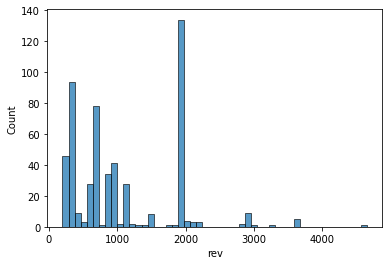

In [23]:
sns.histplot(checks_df.rev, bins=50)

Максимальная сумма выручки - 4650, минимальная - 199, среднее арифметическое значение - около 1060, медиана - 840, наиболее часто встречающееся значение (мода) - 1900. Видно, что значения выручки сосредоточены в левой части графика.

## 1.5 Работа с датафреймами

Объединим все датафреймы в один.

In [24]:
# Сконкатенируем датафреймы groups_df и groups_add_df

groups_full_df = pd.concat((groups_df, groups_add_df), ignore_index=True)
groups_full_df.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [25]:
groups_full_df.shape

(74576, 2)

In [26]:
groups_full_df.nunique()

id     74576
grp        2
dtype: int64

Видим, что все `id` после конкатенации остаются уникальными.

Для того чтобы добавить юзеров из `active_studs_df` и `checks_df` в `groups_full_df`, переименуем столбец `student_id` в `id`.

In [27]:
active_studs_df.rename(columns={'student_id': 'id'}, inplace=True)
active_studs_df.head()

,id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [28]:
checks_df.rename(columns={'student_id': 'id'}, inplace=True)
checks_df.head()

,id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


Перед смёрдживанием всех датафреймов проставим флаг у активных юзеров в `active_studs_df` и заплативших юзеров в `checks_df`.

In [29]:
active_studs_df['is_active'] = 1
active_studs_df.head()

,id,is_active
0,581585,1
1,5723133,1
2,3276743,1
3,4238589,1
4,4475369,1


In [30]:
checks_df['is_paid'] = 1
checks_df.head()

,id,rev,is_paid
0,1627,990.0,1
1,3185,690.0,1
2,25973,690.0,1
3,26280,690.0,1
4,100300,990.0,1


In [31]:
# Объединим датафреймы и заполним пропуски

groups_full_df = pd.merge(groups_full_df, active_studs_df, how='left', on='id')
groups_full_df = pd.merge(groups_full_df, checks_df, how='left', on='id')
groups_full_df = groups_full_df.fillna(0)
groups_full_df.head()

,id,grp,is_active,rev,is_paid
0,1489,B,0.0,0.0,0.0
1,1627,A,1.0,990.0,1.0
2,1768,B,0.0,0.0,0.0
3,1783,B,0.0,0.0,0.0
4,1794,A,0.0,0.0,0.0


In [32]:
groups_full_df.shape

(74576, 5)

In [33]:
groups_full_df.nunique()

id           74576
grp              2
is_active        2
rev             40
is_paid          2
dtype: int64

Видим, что в объединенном датафрейме все `id` также уникальны.

In [34]:
# Посмотрим, сколько всего пользователей в контрольной и тестовой группе
groups_full_df.grp.value_counts()

B    59883
A    14693
Name: grp, dtype: int64

Всего в контрольной группе - 14693 юзера, в тестовой - 59883.

In [35]:
# Посмотрим, сколько активных юзеров в каждой группе
groups_full_df.query('is_active == 1').grp.value_counts()

B    6803
A    1538
Name: grp, dtype: int64

Количество активных юзеров в контрольной группе - 1538, в тестовой группе - 6803.

In [36]:
# Посмотрим, сколько оплативших юзеров в каждой группе
groups_full_df.query('is_paid == 1').grp.value_counts()

B    434
A    107
Name: grp, dtype: int64

Количество заплативших юзеров в контрольной группе - 107, в тестовой группе - 434.

Теперь посмотрим, сколько из оплативших юзеров активны и неактивны (всего оплативших - 541 юзер).

In [37]:
groups_full_df.query('is_active == 1 and is_paid == 1').grp.value_counts()

B    314
A     78
Name: grp, dtype: int64

In [38]:
groups_full_df.query('is_active == 0 and is_paid == 1').grp.value_counts()

B    120
A     29
Name: grp, dtype: int64

Из 541 оплатившего юзера, только 392 являются активными. Вероятно у 149 неактивных и оплативших юзеров произошло списание, но при этом они не заходили на платформу в дни проведения эксперимента.<br>
Из 392 активных и оплативших юзеров к контрольной группе относятся 78, к тестовой - 314.<br>
Из 149 неактивных и оплативших юзеров к контрольной группе относятся 29, к тестовой - 120.

Для дальнейшего исследования и расчета метрик корректнее будет убрать 149 неактивных и оплативших юзеров. Это связано с тем, что мы будем считать CR из активных юзеров в оплатившие и необходимо, чтобы неактивных и оплативших юзеров у нас не было.

In [39]:
groups_full_df = groups_full_df[((groups_full_df.is_active == 0) & (groups_full_df.is_paid == 0)) | 
               ((groups_full_df.is_active == 1) & (groups_full_df.is_paid == 1)) |
               ((groups_full_df.is_active == 1) & (groups_full_df.is_paid == 0))]
groups_full_df.head()

,id,grp,is_active,rev,is_paid
0,1489,B,0.0,0.0,0.0
1,1627,A,1.0,990.0,1.0
2,1768,B,0.0,0.0,0.0
3,1783,B,0.0,0.0,0.0
4,1794,A,0.0,0.0,0.0


# 2. A/B-тестирование

## 2.1 Метрики

В качестве основных метрик я выберу следующие:
- CR (Conversion Rate) - количество оплативших юзеров / количество активных юзеров
- ARPU (Average Revenue Per User) - выручка / количество активных юзеров
- ARPPU (Average Revenue Per Paying User) - выручка / количество оплативших юзеров

In [40]:
# Приведем значения в is_active и is_paid к целочисленному виду
groups_full_df = groups_full_df.astype({'is_active': 'int', 'is_paid': 'int'})
groups_full_df.dtypes

id             int64
grp           object
is_active      int64
rev          float64
is_paid        int64
dtype: object

In [41]:
# Сформируем датафрейм, состоящий только из активных юзеров

groups_active_df = groups_full_df.query('is_active == 1')
groups_active_df.head()

,id,grp,is_active,rev,is_paid
1,1627,A,1,990.0,1
10,2085,B,1,0.0,0
12,2215,B,1,0.0,0
43,3391,A,1,0.0,0
45,3401,B,1,0.0,0


In [42]:
# Подготовим датафрейм для расчета метрик

metrics = groups_active_df.groupby('grp', as_index=False) \
    .agg({'is_active': 'sum', 'is_paid': 'sum', 'rev': 'sum'})
metrics.head()

,grp,is_active,is_paid,rev
0,A,1538,78,72820.0000
1,B,6803,314,394974.0035


In [43]:
# Чтобы посчитать CR разделим кол-во оплативших юзеров на кол-во активных

metrics['CR'] = round(metrics.is_paid / metrics.is_active * 100, 2)
metrics.head()

,grp,is_active,is_paid,rev,CR
0,A,1538,78,72820.0000,5.07
1,B,6803,314,394974.0035,4.62


In [44]:
# Чтобы посчитать ARPU разделим выручку на кол-во активных юзеров

metrics['ARPU'] = round(metrics.rev / metrics.is_active, 2)
metrics.head()

,grp,is_active,is_paid,rev,CR,ARPU
0,A,1538,78,72820.0000,5.07,47.35
1,B,6803,314,394974.0035,4.62,58.06


In [45]:
# Чтобы посчитать ARPPU разделим выручку на кол-во оплативших юзеров

metrics['ARPPU'] = round(metrics.rev / metrics.is_paid, 2)
metrics.head()

,grp,is_active,is_paid,rev,CR,ARPU,ARPPU
0,A,1538,78,72820.0000,5.07,47.35,933.59
1,B,6803,314,394974.0035,4.62,58.06,1257.88


Мы видим, что ARPU и ARPPU в тестовой группе больше по сравнению с контрольной группой, но CR при этом в тестовой группе меньше. Осталось проверить стат. значимы ли эти различия в группах или это случайная флуктуация в значениях.

### CR

Проверять на нормальность наши распределения нет смысла, так как мы имеем дело с качественными переменными и каждое распределение состоит только из 0 и 1.

In [46]:
# Проверим дисперсии двух групп
pg.homoscedasticity(data=groups_active_df, dv='is_paid', group='grp')

,W,pval,equal_var
levene,0.582052,0.445531,True


In [47]:
# Посмотрим на стандартные отклонения двух групп
groups_active_df[groups_active_df.grp == 'A'].is_paid.std(), groups_active_df[groups_active_df.grp == 'B'].is_paid.std()

(0.21948691168442638, 0.20983849455703016)

`equal_var` - True, то есть дисперсии в двух группах примерно одинаковые.

Для проверки стат. значимости применим t-тест, так как среднее от 0 и 1 является пропорцией. Несмотря на то, что условие гомогенности дисперсий в группах соблюдается, я буду использовать t-тест Уэлча (добавим параметр `equal_var=False`). Он будет одинаков при равенстве дисперсий в сравнении с t-тестом Стьюдента, а при неравенстве дисперсий t-тест Уэлча отработает лучше, чем t-тест Стьюдента.

Сформулируем гипотезы для теста:

$H_0$: доля оплативших юзеров среди активных в контрольной и тестовой группе равна.<br>
$H_1$: доля оплативших юзеров среди активных в контрольной и тестовой группе не равна.

In [48]:
ss.ttest_ind(groups_active_df[groups_active_df.grp == 'A'].is_paid,
             groups_active_df[groups_active_df.grp == 'B'].is_paid,
             equal_var=False)

Ttest_indResult(statistic=0.7415849887091547, pvalue=0.4584173887363956)

В t-тесте p-value > 0.05, то есть различия в CR не стат. значимы, полученное в тесте значение является случайной флуктуацией.

### ARPU

Проверим на нормальность наши распределения. Тест Шапиро-Уилка больше подходит для маленьких выборок, он более чувствителен к ненормальности. Поэтому проверим через тест Агостино-Пирсона, этот тест больше адаптирован к большим выборкам. $H_0$: наблюдения распределены нормально.

In [49]:
ss.normaltest(groups_active_df[groups_active_df.grp == 'A'].rev)

NormaltestResult(statistic=2240.595797407402, pvalue=0.0)

In [50]:
ss.normaltest(groups_active_df[groups_active_df.grp == 'B'].rev)

NormaltestResult(statistic=7797.399211581946, pvalue=0.0)

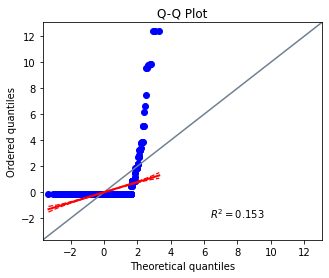

In [51]:
# Дополнительно проверим нормальность распределения визуально в контрольной группе
pg.qqplot(groups_active_df[groups_active_df.grp == 'A'].rev)

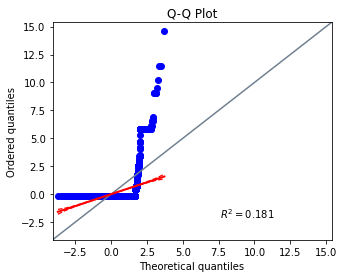

In [52]:
# Дополнительно проверим нормальность распределения визуально в тестовой группе
pg.qqplot(groups_active_df[groups_active_df.grp == 'B'].rev)

In [53]:
# Проверим дисперсии двух групп
pg.homoscedasticity(data=groups_active_df, dv='rev', group='grp')

,W,pval,equal_var
levene,1.501461,0.220481,True


In [54]:
# Посмотрим на стандартные отклонения двух групп
groups_active_df[groups_active_df.grp == 'A'].rev.std(), groups_active_df[groups_active_df.grp == 'B'].rev.std()

(290.4906317804935, 313.7702006379398)

Наши наблюдения распределены ненормально в обеих группах, а вот дисперсии примерно равны.

Для проверки стат. значимости применим t-тест, так как мы сравниваем среднее в обеих группах. Хотелось бы отметить, что t-тест работает и при ненормальных распределениях, о чем говорится в [статье](https://koch-kir.medium.com/%D0%B8%D1%81%D1%82%D0%BE%D1%80%D0%B8%D1%8F-%D0%BE%D0%B4%D0%BD%D0%BE%D0%B3%D0%BE-%D0%BE%D0%B1%D0%BC%D0%B0%D0%BD%D0%B0-%D0%B8%D0%BB%D0%B8-%D1%82%D1%80%D0%B5%D0%B1%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F-%D0%BA-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8E-%D0%B2-%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85-%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%85-55139a5558d) (нужен VPN). Я буду применять t-тест Уэлча, при равенстве дисперсий он будет одинаков в сравнении с t-тестом Стьюдента, а при неравенстве дисперсий отработает лучше, чем t-тест Стьюдента.

Сформулируем гипотезы для теста:

$H_0$: средняя выручка с активного пользователя в контрольной и тестовой группе равна.<br>
$H_1$: средняя выручка с активного пользователя в контрольной и тестовой группе не равна.

In [55]:
ss.ttest_ind(groups_active_df[groups_active_df.grp == 'A'].rev,
             groups_active_df[groups_active_df.grp == 'B'].rev,
             equal_var=False)

Ttest_indResult(statistic=-1.286373849379703, pvalue=0.19843583641451018)

В t-тесте p-value > 0.05, то есть различия в ARPU не стат. значимы, полученное в тесте значение является случайной флуктуацией.

### ARPPU

Проверим на нормальность наши распределения. Тест Шапиро-Уилка больше подходит для маленьких выборок, он более чувствителен к ненормальности. Поэтому проверим через тест Агостино-Пирсона, этот тест больше адаптирован к большим выборкам. $H_0$: наблюдения распределены нормально.

In [56]:
ss.normaltest(groups_active_df[(groups_active_df.grp == 'A') & (groups_active_df.is_paid == 1)].rev)

NormaltestResult(statistic=30.378419638487475, pvalue=2.5316868804220266e-07)

In [57]:
ss.normaltest(groups_active_df[(groups_active_df.grp == 'B') & (groups_active_df.is_paid == 1)].rev)

NormaltestResult(statistic=6.795662714490353, pvalue=0.033445723194625424)

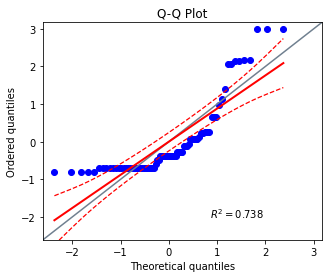

In [58]:
# Дополнительно проверим нормальность распределения визуально в контрольной группе
pg.qqplot(groups_active_df[(groups_active_df.grp == 'A') & (groups_active_df.is_paid == 1)].rev)

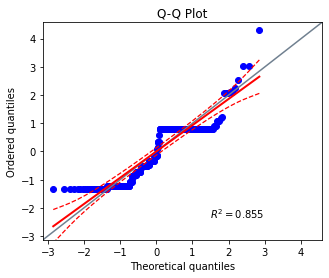

In [59]:
# Дополнительно проверим нормальность распределения визуально в тестовой группе
pg.qqplot(groups_active_df[(groups_active_df.grp == 'B') & (groups_active_df.is_paid == 1)].rev)

In [60]:
# Проверим дисперсии двух групп
pg.homoscedasticity(data=groups_active_df[groups_active_df.is_paid == 1], dv='rev', group='grp')

,W,pval,equal_var
levene,3.075682,0.080257,True


In [61]:
# Посмотрим на стандартные отклонения двух групп
groups_active_df[(groups_active_df.grp == 'A') & (groups_active_df.is_paid == 1)].rev.std(), groups_active_df[(groups_active_df.grp == 'B') & (groups_active_df.is_paid == 1)].rev.std()

(919.9327112023972, 790.8642538632823)

Наблюдения распределены ненормально, а дисперсии в наших группах примерно одинаковые, гомогенность соблюдается.

Для проверки стат. значимости применим t-тест, так как мы сравниваем среднее в обеих группах. Он работает и при ненормальных распределениях.

Я буду применять t-тест Уэлча, так как если дисперсии равны, то он будет одинаков в сравнении с t-тестом Стьюдента.

Сформулируем гипотезы для теста:

$H_0$: средняя выручка с платящего пользователя в контрольной и тестовой группе равна.<br>
$H_1$: средняя выручка с платящего пользователя в контрольной и тестовой группе не равна.

In [62]:
ss.ttest_ind(groups_active_df[(groups_active_df.grp == 'A') & (groups_active_df.is_paid == 1)].rev,
             groups_active_df[(groups_active_df.grp == 'B') & (groups_active_df.is_paid == 1)].rev,
             equal_var=False)

Ttest_indResult(statistic=-2.861689755269415, pvalue=0.005069734012800116)

Видим, что p-value гораздо меньше 0.05, значит различия в ARPPU для контрольной и тестовой группы стат. значимы.

## 2.2 Вывод

В результате было выявлено, что:

- изменения метрик CR и ARPU не стат. значимы
- изменение метрики ARPPU стат. значимо

В целом, можно применить новую механику оплаты услуг на сайте, что повысит среднюю выручку на платящего пользователя. Но перед тем, как выкатывать фичу на всех юзеров, я бы дополнительно уточнила насчет дисбаланса в кол-ве юзеров в контрольной и тестовой группе, а также про необычных юзеров - неактивных, но оплативших.

# 3. SQL

In [63]:
# Объявляем параметры подключения

connection = {'host': 'https://clickhouse.lab.karpov.courses',
              'database': 'default',
              'user': 'student',
              'password': 'dpo_python_2020'
             }

## 3.1 Очень усердные ученики

Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных студентов.

In [64]:
# Импортируем таблицу из БД

query = '''
SELECT
    st_id,
    toDateTime(timest) as datetime,
    correct,
    subject
FROM default.peas
LIMIT 10
'''

In [65]:
ph.read_clickhouse(query=query, connection=connection)

,st_id,datetime,correct,subject
0,100379,2021-10-30 13:32:29,1,Theory of probability
1,100379,2021-10-30 14:11:19,0,Vizualization
2,100379,2021-10-30 15:54:22,1,Theory of probability
3,100379,2021-10-30 16:44:50,1,Vizualization
4,100379,2021-10-30 17:15:05,1,Theory of probability
5,100379,2021-10-30 18:02:37,1,Theory of probability
6,100379,2021-10-30 18:17:25,1,Vizualization
7,100379,2021-10-30 18:32:26,0,Theory of probability
8,100379,2021-10-30 19:19:33,1,Vizualization
9,100379,2021-10-30 19:28:03,1,Theory of probability


In [66]:
# Посмотрим, каким периодом данных мы располагаем

query = '''
SELECT
    date(min(timest)) date_min,
    date(max(timest)) date_max
FROM default.peas
'''

In [67]:
ph.read_clickhouse(query=query, connection=connection)

,date_min,date_max
0,2021-10-30,2021-10-31


Всего в таблице у нас 2 даты - 30 и 31 октября 2021 г., они относятся к одному месяцу.

In [68]:
# Отберем очень усердных учеников, тех, кто хотя бы раз за текущий месяц правильно решил 20 горошин
# Дополнительно добавляем условие о текущем (последнем) месяце

query = '''
SELECT st_id,
       SUM(correct) as correct_sum
FROM default.peas
WHERE date_trunc('month', timest) = (SELECT date_trunc('month', max(timest)) FROM default.peas)
GROUP BY st_id
HAVING correct_sum >= 20
'''

In [69]:
ph.read_clickhouse(query=query, connection=connection)

,st_id,correct_sum
0,700123,126
1,171209,26
2,219630,53
3,416918,26
4,877738,22
...,...,...
131,375731,24
132,71465,38
133,936163,29
134,790532,22


In [70]:
# Посчитаем кол-во усердных учеников, поместив предыдущий запрос в подзапрос

query = '''
SELECT COUNT(DISTINCT st_id) as good_st_count
FROM (
      SELECT
          st_id,
          SUM(correct) as correct_sum
      FROM default.peas
      WHERE date_trunc('month', timest) = (SELECT date_trunc('month', max(timest)) FROM default.peas)
      GROUP BY st_id
      HAVING correct_sum >= 20
     )
'''

In [71]:
ph.read_clickhouse(query=query, connection=connection)

,good_st_count
0,136


Всего 136 очень усердных студентов.

## 3.2 Оптимизация воронки

Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:

- ARPU 
- ARPAU
- CR в покупку 
- СR активного пользователя в покупку 
- CR пользователя из активности по математике (`subject = 'Math'`) в покупку курса по математике

Посмотрим на таблицы `default.studs` и `default.final_project_check`.

In [72]:
query = '''
SELECT *
FROM default.studs
LIMIT 10
'''

In [73]:
ph.read_clickhouse(query=query, connection=connection)

,st_id,test_grp
0,100379,pilot
1,101432,control
2,104818,pilot
3,104885,pilot
4,104966,pilot
5,106010,pilot
6,106028,pilot
7,106464,pilot
8,106816,control
9,107250,control


In [74]:
query = '''
SELECT 
    st_id,
    toDateTime(sale_time) as sale_datetime,
    money,
    subject
FROM default.final_project_check
LIMIT 10
'''

In [75]:
ph.read_clickhouse(query=query, connection=connection)

,st_id,sale_datetime,money,subject
0,101432,2021-10-31 04:44:32,85000,Math
1,101432,2021-10-31 12:43:50,65000,Vizualization
2,104885,2021-10-30 17:05:55,65000,Vizualization
3,104885,2021-10-30 22:49:33,75000,Statistics
4,106464,2021-10-31 13:17:13,85000,Math
5,114606,2021-10-31 02:26:19,75000,Statistics
6,147316,2021-10-31 11:12:27,65000,Vizualization
7,149640,2021-10-30 19:53:19,65000,Vizualization
8,230858,2021-10-31 08:14:34,85000,Math
9,269738,2021-10-30 21:33:24,70000,Theory of probability


In [76]:
# Посчитаем кол-во решенных задач всего и по математике поюзерно
# Это нужно, чтобы потом полученное приджойнить к default.studs и default.final_project_check

query = '''
SELECT
    st_id,
    SUM(correct) AS correct_sum,
    sumIf(correct, subject = 'Math') AS math_correct_sum
FROM default.peas
GROUP BY st_id
'''

In [77]:
ph.read_clickhouse(query=query, connection=connection)

,st_id,correct_sum,math_correct_sum
0,414769,15,0
1,878110,1,0
2,700123,126,0
3,171209,26,0
4,289442,13,0
...,...,...,...
303,370427,15,0
304,421765,17,0
305,790532,22,14
306,594177,25,0


In [78]:
# Джойним все 3 таблицы и считаем метрики

query = '''
SELECT
    test_grp,
    ROUND(SUM(money) / COUNT(DISTINCT a.st_id), 2) AS ARPU,
    ROUND(sumIf(money, correct_sum > 10) / uniqIf(a.st_id, correct_sum > 10), 2) AS ARPAU,
    ROUND(uniqIf(a.st_id, money > 0) / COUNT(DISTINCT a.st_id) * 100, 2) AS CR_purchase,
    ROUND(uniqIf(a.st_id, money > 0 and correct_sum > 10) / uniqIf(a.st_id, correct_sum > 10) * 100, 2) AS CR_purchase_by_active,
    ROUND(uniqIf(a.st_id, money > 0 and math_correct_sum >= 2 and subject = 'Math') / uniqIf(a.st_id, math_correct_sum >= 2) * 100, 2) AS CR_math_purchase
FROM default.studs AS a
LEFT JOIN default.final_project_check AS b ON a.st_id = b.st_id
LEFT JOIN (
           SELECT
               st_id,
               SUM(correct) AS correct_sum,
               sumIf(correct, subject = 'Math') AS math_correct_sum
           FROM default.peas
           GROUP BY st_id
          ) AS c ON a.st_id = c.st_id
GROUP BY test_grp
'''

In [79]:
ph.read_clickhouse(query=query, connection=connection)

,test_grp,ARPU,ARPAU,CR_purchase,CR_purchase_by_active,CR_math_purchase
0,control,4540.98,10393.70,4.92,11.02,6.12
1,pilot,11508.47,29739.58,10.85,26.04,9.52


Все необходимые метрики посчитаны. Видно, что в тестовой группе абсолютно все метрики выросли, но непонятно, стат. значимы эти различия или нет.

# 4. Python

## 4.1 Функция для метрик

In [80]:
def metrics(groups_df, groups_add_df, active_studs_df, checks_df):

# Переименуем столбец student_id в id
    active_studs_df.rename(columns={'student_id': 'id'}, inplace=True)
    checks_df.rename(columns={'student_id': 'id'}, inplace=True)

# Проставим флаг у активных юзеров и заплативших юзеров
    active_studs_df['is_active'] = 1
    checks_df['is_paid'] = 1
    
# Объединим датафреймы и заполним пропуски
    groups_full_df = pd.concat((groups_df, groups_add_df), ignore_index=True)
    groups_full_df = pd.merge(groups_full_df, active_studs_df, how='left', on='id')
    groups_full_df = pd.merge(groups_full_df, checks_df, how='left', on='id')
    groups_full_df = groups_full_df.fillna(0)

# Приведем значения в is_active и is_paid к целочисленному виду
    groups_full_df = groups_full_df.astype({'is_active': 'int', 'is_paid': 'int'})
    
# Сформируем датафрейм, состоящий только из активных юзеров
    groups_active_df = groups_full_df.query('is_active == 1')
    
# Подготовим датафрейм для расчета метрик
    metrics = groups_active_df.groupby('grp', as_index=False) \
        .agg({'is_active': 'sum', 'is_paid': 'sum', 'rev': 'sum'})    

# Рассчитаем метрики
    metrics['CR'] = round(metrics.is_paid / metrics.is_active * 100, 2)
    metrics['ARPU'] = round(metrics.rev / metrics.is_active, 2)
    metrics['ARPPU'] = round(metrics.rev / metrics.is_paid, 2)
    
    return metrics

In [81]:
metrics = metrics(groups_df, groups_add_df, active_studs_df, checks_df)
metrics

,grp,is_active,is_paid,rev,CR,ARPU,ARPPU
0,A,1538,78,72820.0000,5.07,47.35,933.59
1,B,6803,314,394974.0035,4.62,58.06,1257.88


## 4.2 Функция для графиков

In [82]:
def metrics_vis():
    
# Определяем параметры для графиков    
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    
# Строим график для CR
    sns.barplot(ax=axes[0], data=metrics, x='grp', y='CR')
    axes[0].set_title('CR')
    axes[0].set_xlabel('Группа')
    
# Строим график для ARPU
    sns.barplot(ax=axes[1], data=metrics, x='grp', y='ARPU')
    axes[1].set_title('ARPU')
    axes[1].set_xlabel('Группа')

# Строим график для ARPU
    sns.barplot(ax=axes[2], data=metrics, x='grp', y='ARPPU')
    axes[2].set_title('ARPPU')
    axes[2].set_xlabel('Группа')

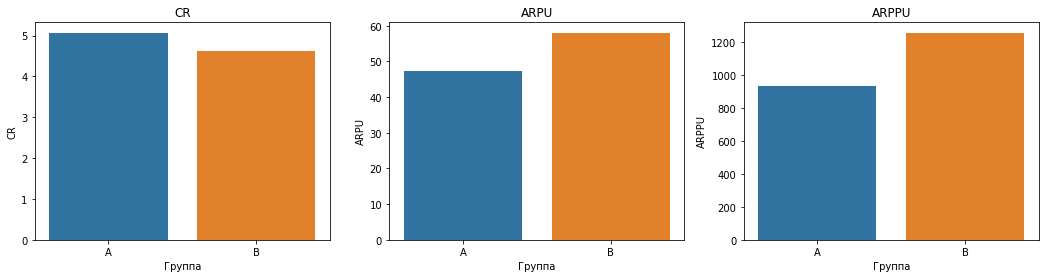

In [83]:
metrics_vis()